In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import (make_blobs, make_circles, make_moons)
from sklearn.preprocessing import MinMaxScaler

In [3]:
data = make_circles(factor=0.5, random_state=42, noise=0.05, n_samples=500)[0]
scaler = MinMaxScaler()
if len(data.shape) == 1:
    data = data.reshape(-1, 1)
data = scaler.fit_transform(data)

In [4]:
data

array([[0.28776571, 0.57971747],
       [0.42813302, 0.92523111],
       [0.28676398, 0.49505122],
       [0.19526279, 0.19317708],
       [0.12343889, 0.75068172],
       [0.30458393, 0.37780513],
       [0.28418753, 0.50026798],
       [0.05528462, 0.52096079],
       [0.42487831, 0.90785733],
       [0.56220181, 0.2462002 ],
       [0.95452731, 0.57644527],
       [0.60677675, 0.0180641 ],
       [0.37575273, 0.30787618],
       [0.23850572, 0.84963189],
       [0.31967709, 0.50760905],
       [0.29797834, 0.41060921],
       [0.72979726, 0.44699067],
       [0.84018783, 0.80198   ],
       [0.52205448, 0.66620089],
       [0.38536612, 0.33371386],
       [0.71799694, 0.41859532],
       [0.75183089, 0.44132419],
       [0.63605139, 0.64664609],
       [0.32568622, 0.60757602],
       [0.33612352, 0.87616849],
       [0.62425478, 0.3736816 ],
       [0.69749061, 0.45062431],
       [0.76886684, 0.11354201],
       [0.12018415, 0.78382524],
       [0.36569551, 0.67675654],
       [0.

Minimum Spanning Tree total edge length: 9.843489695686728


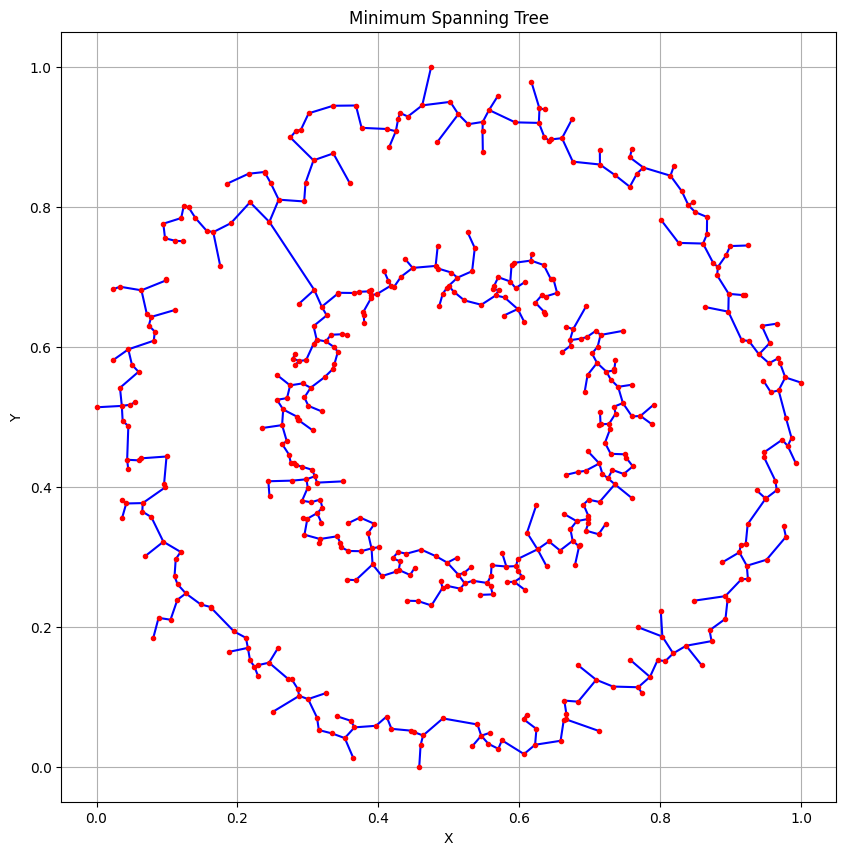

In [19]:
import heapq
import matplotlib.pyplot as plt

def calculate_distance(point1, point2):
    return ((point1[0] - point2[0]) ** 2 + (point1[1] - point2[1]) ** 2) ** 0.5

def prim_mst(points):
    n = len(points)
    if n == 0:
        return 0, []

    visited = [False] * n
    min_heap = [(0, 0, -1)]  # (cost, point index, parent index)
    total_cost = 0
    mst_edges = []

    while min_heap:
        cost, u, parent = heapq.heappop(min_heap)
        if visited[u]:
            continue
        visited[u] = True
        total_cost += cost
        if parent != -1:
            mst_edges.append((parent, u))

        for v in range(n):
            if not visited[v]:
                distance = calculate_distance(points[u], points[v])
                heapq.heappush(min_heap, (distance, v, u))

    return total_cost, mst_edges

def plot_mst(points, edges):
    plt.figure(figsize=(10, 10))
    for (i, j) in edges:
        plt.plot([points[i][0], points[j][0]], [points[i][1], points[j][1]], 'b-')

    for point in points:
        plt.plot(point[0], point[1], 'ro', markersize=3)

    plt.title('Minimum Spanning Tree')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.grid(True)

points = data

mst_total_weight, mst_edges = prim_mst(points)
print("Minimum Spanning Tree total edge length:", mst_total_weight)

plot_mst(points, mst_edges)
plt.show()

Minimum Spanning Tree total edge length: 7.681995042727241


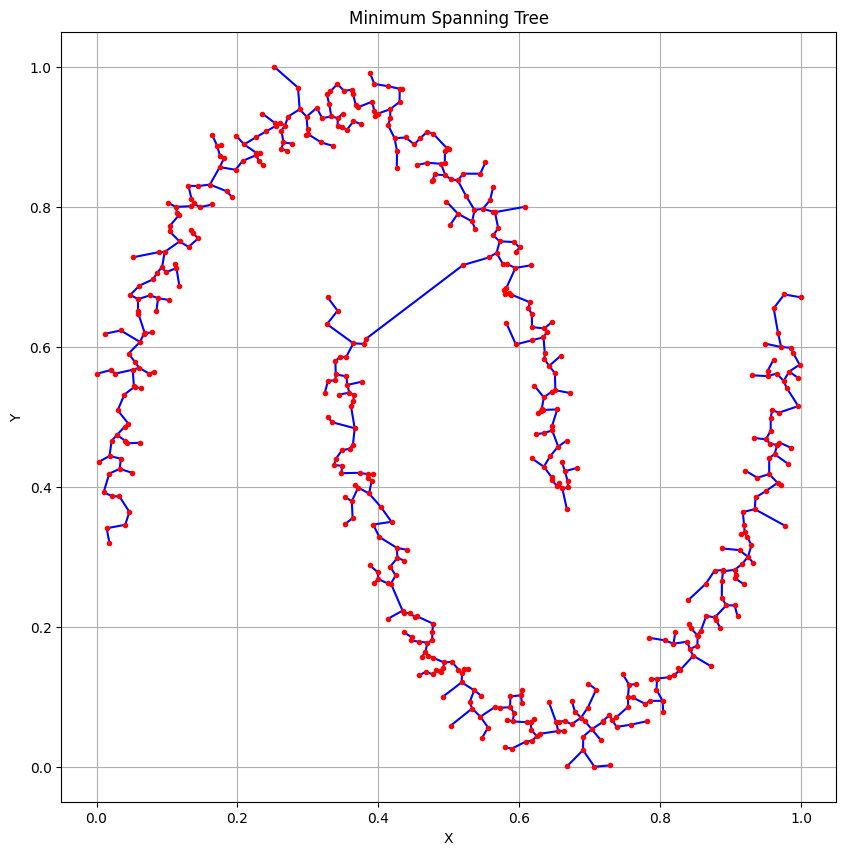

In [20]:
data2 = make_moons(n_samples=500, random_state=42, noise=0.05)[0]
data2 = scaler.fit_transform(data2)

mst_total_weight, mst_edges = prim_mst(data2)
print("Minimum Spanning Tree total edge length:", mst_total_weight)

plot_mst(data2, mst_edges)
plt.show()